# **CUSTOMER SEGMENTATION USING K MEANS CLUSTERING**
*By:*  
PIET21CA044 -*Raksha Khandelwal*,  
PIET21CA053 -*Simmi Chaudhary*,  
PIET21CA058 -*Vaishnavi Goyel*,

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [7]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
X = customer_data.iloc[:,[3,4]].values

In [10]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [11]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

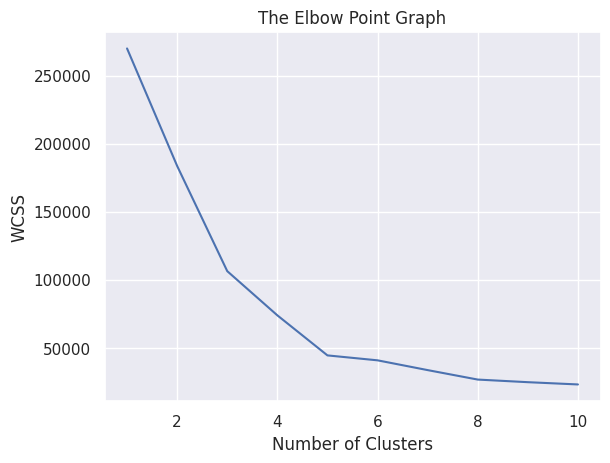

In [12]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters

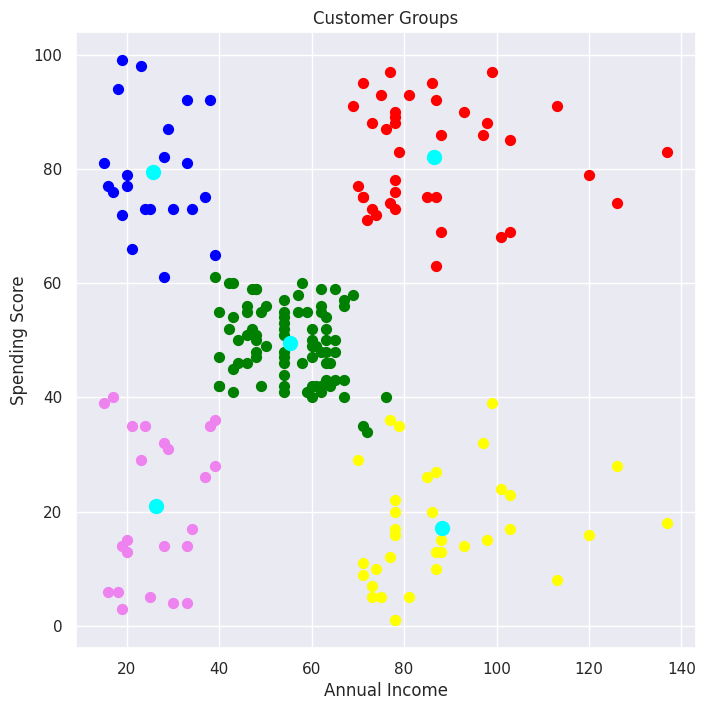

In [14]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assume `data` is your original dataset
# Replace this with your actual dataset
data = np.random.rand(100, 10)  # Placeholder for the actual data

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(scaled_data)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, kmeans.labels_, test_size=0.2, random_state=42)

# Train a logistic regression classifier
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predict clusters for test data
y_pred = clf.predict(X_test)

# Evaluate classifier performance
print(classification_report(y_test, y_pred))

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.96      0.92      0.93        20
weighted avg       0.96      0.95      0.95        20

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.96      0.92      0.93        20
weighted avg       0.96      0.95      0.95        20



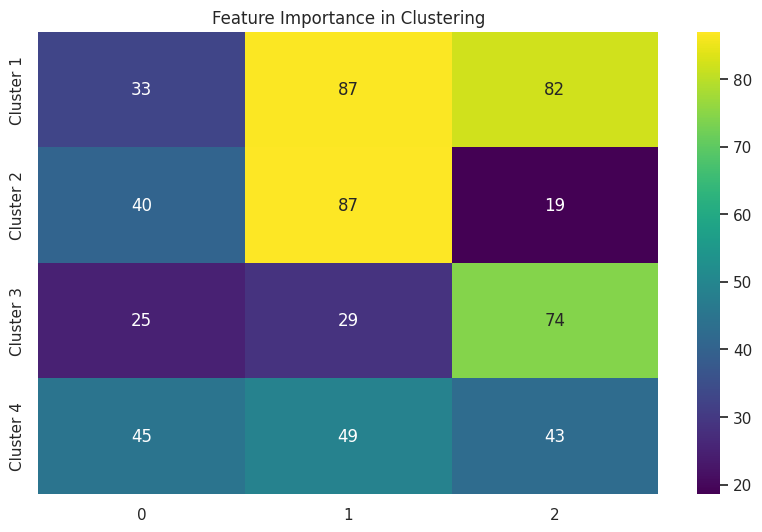

In [16]:

# Load your data from the CSV file
input_data = pd.read_csv('/content/Mall_Customers.csv')

# Drop non-numerical columns (assuming 'CustomerID' is non-numerical)
input_data = input_data.drop(['CustomerID', 'Gender'], axis=1)

# Fit a KMeans model with all features
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}
kmeans_all_features = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans_all_features.fit(input_data)

# Get feature importances from KMeans model
feature_importances = kmeans_all_features.cluster_centers_

# Plot feature importance using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importances, annot=True, cmap='viridis', yticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('Feature Importance in Clustering')
plt.show()



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import ipywidgets as widgets
from ipywidgets import interact

# Load data
customer_data = pd.read_csv('/content/Mall_Customers.csv')

# Select relevant features
X = customer_data.iloc[:, [3, 4]].values

def perform_clustering(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    Y = kmeans.fit_predict(X)
    customer_data['Cluster'] = Y
    return customer_data, kmeans

# Function to update dashboard based on selected number of clusters
def update_dashboard(selected_clusters):
    clustered_data, kmeans = perform_clustering(selected_clusters)

    # Plot clusters using matplotlib
    plt.figure(figsize=(10, 8))

    for cluster in range(selected_clusters):
        cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
        plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                    label=f'Cluster {cluster + 1}')

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title(f'Customer Segmentation with {selected_clusters} Clusters')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

# Dropdown for selecting number of clusters
cluster_dropdown = widgets.Dropdown(
    options=list(range(2, 11)),  # Range of clusters from 2 to 10
    value=5,  # Default value
    description='Number of Clusters:',
    style={'description_width': 'initial'},
    disabled=False
)

# Interactive output for updating the dashboard
interact(update_dashboard, selected_clusters=cluster_dropdown)


interactive(children=(Dropdown(description='Number of Clusters:', index=3, options=(2, 3, 4, 5, 6, 7, 8, 9, 10…

<function __main__.update_dashboard(selected_clusters)>

In [18]:
# Install necessary libraries
!pip install ipywidgets pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display, clear_output
import io

# Global variables to store data
input_data = None
processed_data = None
kmeans_all_features = None

# Function to handle file upload and data loading
def load_data(change):
    global input_data
    uploaded_file = change['new']
    content = uploaded_file[list(uploaded_file.keys())[0]]['content']
    input_data = pd.read_csv(io.BytesIO(content))
    display(input_data.head())

# Function to preprocess data
def preprocess_data(button):
    global processed_data
    if input_data is None:
        print("Please load the data first.")
        return
    processed_data = input_data.drop(['CustomerID', 'Gender'], axis=1)
    display(processed_data.head())

# Function to fit KMeans
def fit_kmeans(button):
    global kmeans_all_features
    if processed_data is None:
        print("Please preprocess the data first.")
        return
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "random_state": 1,
    }
    kmeans_all_features = KMeans(n_clusters=4, **kmeans_kwargs)
    kmeans_all_features.fit(processed_data)
    print("KMeans clustering performed successfully!")

# Function to plot feature importances
def plot_feature_importances(button):
    if kmeans_all_features is None:
        print("Please fit the KMeans model first.")
        return
    feature_importances = kmeans_all_features.cluster_centers_
    plt.figure(figsize=(10, 6))
    sns.heatmap(feature_importances, annot=True, cmap='viridis', yticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
    plt.title('Feature Importance in Clustering')
    plt.show()

# Create file upload widget
file_upload = widgets.FileUpload(accept='.csv', multiple=False)

# Create buttons
preprocess_button = widgets.Button(description="Preprocess Data")
fit_kmeans_button = widgets.Button(description="Fit KMeans")
plot_button = widgets.Button(description="Plot Feature Importances")

# Assign button click actions
file_upload.observe(load_data, names='value')
preprocess_button.on_click(preprocess_data)
fit_kmeans_button.on_click(fit_kmeans)
plot_button.on_click(plot_feature_importances)

# Display widgets
display(file_upload)
display(preprocess_button)
display(fit_kmeans_button)
display(plot_button)


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


FileUpload(value={}, accept='.csv', description='Upload')

Button(description='Preprocess Data', style=ButtonStyle())

Button(description='Fit KMeans', style=ButtonStyle())

Button(description='Plot Feature Importances', style=ButtonStyle())